<a href="https://colab.research.google.com/github/eroolpal/detect_damagecause/blob/master/floodfireearthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *


In [0]:
folder = 'fire'
file = 'urls_fire.csv'

In [0]:

path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving firedamaged.csv to firedamaged.csv


In [0]:
!mv firedamaged.csv data/damage/urls_fire.csv

In [0]:

classes = ['fire','flood','earthquake']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:

folder = 'flood'
file = 'urls_flood.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:

from google.colab import files
uploaded = files.upload()

Saving flooddamaged.csv to flooddamaged.csv


In [0]:

!mv flooddamaged.csv data/damage/urls_flood.csv

In [0]:
classes = ['fire','flood','earthquake']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:

folder = 'earthquake'
file = 'urls_earthquake.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [16]:

from google.colab import files
uploaded = files.upload()

Saving earthquakedamaged.csv to earthquakedamaged.csv


In [0]:
!mv earthquakedamaged.csv data/damage/urls_earthquake.csv

In [0]:
classes = ['fire','flood','earthquake']

In [0]:

download_images(path/file, dest, max_pics=200)

In [0]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

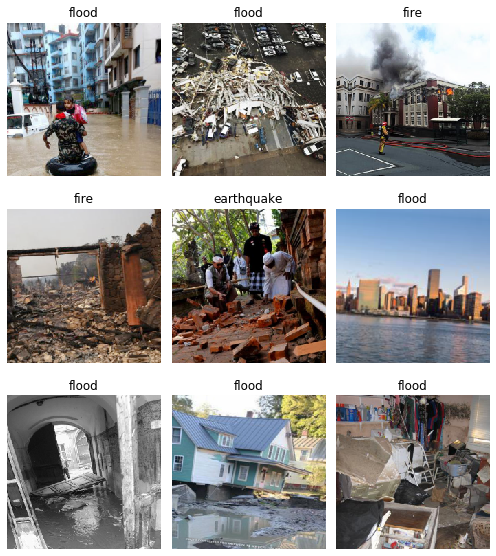

In [22]:
data.show_batch(rows=3, figsize=(7,8))

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 52.0MB/s]


In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.553557,1.397907,0.481818,00:10
1,1.256386,1.014821,0.381818,00:07
2,1.052930,1.093023,0.372727,00:08
3,0.979098,1.071488,0.354545,00:07


In [0]:

learn.save('stage-1')

In [0]:
learn.unfreeze()

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


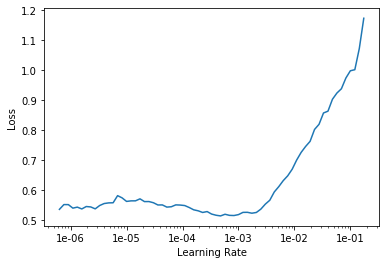

In [37]:
learn.recorder.plot()

In [38]:

learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.629871,0.654389,0.272727,00:08
1,0.553888,0.644754,0.254545,00:08


In [0]:

learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:

interp = ClassificationInterpretation.from_learner(learn)

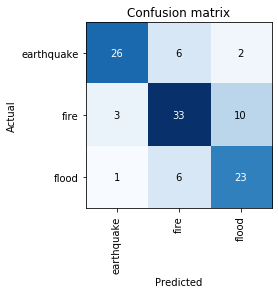

In [42]:
interp.plot_confusion_matrix()

In [0]:

defaults.device = torch.device('cpu')

In [44]:
from google.colab import files
uploaded = files.upload()

Saving china_earthquake.jpeg to china_earthquake.jpeg


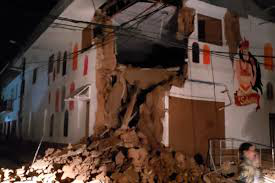

In [45]:
img = open_image('china_earthquake.jpeg')
img

In [47]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category earthquake